### About Dataset

##### Context

This dataset contains the lap time information for the FIA World Endurance Championship (WEC) for the 2012 to 2022 seasons. Included in the dataset is the: lap times, the driver who set the lap times, the car they set the lap time with, the car number of the car the lap time was set with, the class they were in, the team they were in, the track they set the time at, what round of the championship they set the time at, and which year of the championship they set the lap time at.

#### Content

###### number: The car number that completed the lap
###### driver_number: The driver of the car number that completed the lap
###### lap_number: The lap number of the race the lap was completed at
###### lap_time: The lap time recorded as they crossed the timing beam
###### lap_improvement: Haven't looked into this, but my guess would a variable showing if the driver made improvement vs previous lap_times. Likely 0 is no improvement, 1 is green (personal best), 2 is purple (race best), and 3 is a WR? 99% of the laps have 0 improvement, so further research probably needed.
###### crossing_finish_line_in_pit: boolean for if they crossed the finish line, B if they did, nan else
###### s1, s2, s3 The sector times recorded as they crossed the timing beam (recorded in ss.mss)
###### s1/s2/s3_improvement similar to lap_improvement
###### s1/s2/s3_large: how they crossed the timing beams similar to lap_time
###### t6, t7, porsche, ford: only applicable to LE_MANS, the timing recorded similar to s1, s2, s3_large
###### kph: the average kph of the lap
###### top_speed: the fastest recorded time of the lap
###### driver_name: the driver that recorded the lap
###### pit_time: the recorded time that was spent in the pitlane (typically followed by "B" in crossing_finish_line_in_pit)
###### class: the class of the car that set the lap time
###### group: the group of the car that set the lap time, only applicable to LMP1s and LMP2 Pro/Am (2021 season?)
###### team: the team of the car that set the lap
###### manufacturer: the manufacturer of the car that set the lap
###### season: the WEC season the lap was set at
###### circuit: the circuit the lap was set at
###### round: the round (race number in the championship) the lap was set at
###### vehicle: the car the lap was set with
###### flag_at_fl: the flag status at the timing beam (only for 2022)
###### lap_time_ms: The lap time recorded in milliseconds (seconds*1000)
###### lap_time_s: the lap time recorded in seconds
###### team_no: A combination of team and the team's number e.g Toyota Gazoo Racing #7
###### engine: The engine of the car the lap was set with.
###### driver_stint_no: Labeling the driver stint. A stint changes when the driver pits and either a. stays in the car, or b. swaps into the car.
###### driver_stint: A combination of driver_name and the driver_stint_no, e.g. Mike CONWAY Stint #1
###### team_stint_no: Labeling the team stint. A stint changes when the driver pits.
###### team_stint: A combination of team_no and the team_stint_no, e.g. Toyota Gazoo Racing #7 Stint #1
###### position: The position of the car at the time of the lap.
###### class_position: The position of the car in class at the time of the lap.
###### interval_ms: The interval (gap to the car in front for position) in ms
###### interval: The interval (gap to the car in front for position) in s
###### gap: The total time to the leader (time to 1st position overall) in s
###### class_interval: The interval (gap to the car in front for position in class) in s
###### class_gap The total time to the leader (time to 1st position in class) in s

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
dataset = pd.read_csv('2012-2022_FIA_WEC_FULL_LAP_DATA.csv',low_memory=False)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483178 entries, 0 to 483177
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   483178 non-null  int64  
 1   number                       483178 non-null  float64
 2   driver_number                483178 non-null  float64
 3   lap_number                   483178 non-null  float64
 4   lap_time                     483178 non-null  object 
 5   lap_improvement              483178 non-null  float64
 6   crossing_finish_line_in_pit  26468 non-null   object 
 7   s1                           483068 non-null  object 
 8   s1_improvement               483178 non-null  float64
 9   s2                           482905 non-null  object 
 10  s2_improvement               483178 non-null  float64
 11  s3                           482984 non-null  object 
 12  s3_improvement               483178 non-null  float64
 13 

In [4]:
dataset.shape

(483178, 51)

In [5]:
dataset.head()

,Unnamed: 0,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,...,team_stint_no,team_stint,elapsed_ms,position,class_position,interval_ms,interval,gap,class_interval,class_gap
0,0,57.0,1.0,1.0,2:23.141,0.0,NaN,52.533,0.0,45.335,...,1,Krohn Racing #57 Stint #1,143141,20.0,1.0,349.0,0.349,26.922,0.000,0.000
1,1,88.0,2.0,1.0,2:24.016,0.0,NaN,52.915,0.0,45.342,...,1,Team Felbermayr-Proton #88 Stint #1,144016,21.0,2.0,875.0,0.875,27.797,0.875,0.875
2,2,50.0,2.0,1.0,2:25.278,0.0,NaN,53.568,0.0,45.577,...,1,Larbre Competition #50 Stint #1,145278,22.0,3.0,1262.0,1.262,29.059,1.262,2.137
3,3,70.0,2.0,1.0,2:25.548,0.0,NaN,53.938,0.0,45.614,...,1,Larbre Competition #70 Stint #1,145548,23.0,4.0,270.0,0.270,29.329,0.270,2.407
4,4,61.0,2.0,1.0,2:25.859,0.0,NaN,54.482,0.0,45.816,...,1,AF Corse-Waltrip #61 Stint #1,145859,24.0,5.0,311.0,0.311,29.640,0.311,2.718


In [6]:
dataset_float = dataset.loc[:,dataset.dtypes == 'float64']

In [7]:
C_dtype = {}
for item in list(dataset_float.columns):
    C = 0
    length = len(dataset_float[item])
    for i in dataset_float[item]:
        if i.is_integer():
            C += 1
    if C == length:
        C_dtype[item] = 'int64'

###### According to initial checking, * solve problem of lack of memory with using chunk loading. * change possible float number to intiger

In [11]:
temp = pd.read_csv('2012-2022_FIA_WEC_FULL_LAP_DATA.csv',
                   chunksize=10000,
                  dtype=C_dtype)

In [12]:
dataset = pd.concat(temp, ignore_index=True)

###### Check the 'Unnamed: 0' columns, change name and select as index

In [13]:
dataset['Unnamed: 0'].count()

483178

In [14]:
dataset['Unnamed: 0'].nunique()

483178

In [15]:
dataset.rename(columns={'Unnamed: 0':'data_index'}, inplace = True)
dataset.set_index('data_index', inplace=True)

###### work on date format of some features

In [16]:
date_list = ['lap_time','s1','s2','s3','pit_time']
sector_date = ['s1','s2','s3']

In [17]:
dataset.pit_time.value_counts().sort_values()

0:00:29.310      1
0:00:38.247      1
0:01:27.552      1
0:01:43.903      1
0:01:11.167      1
              ... 
0:00:58         99
0:01:04        100
0:01:25        100
0:01:01        104
0:01:02        117
Name: pit_time, Length: 19082, dtype: int64

In [18]:
dataset[date_list].isnull().sum()

lap_time         0
s1             110
s2             273
s3             194
pit_time    456506
dtype: int64

In [19]:
dataset[date_list].dtypes

lap_time    object
s1          object
s2          object
s3          object
pit_time    object
dtype: object

##### check which of object futures can change to category datatype

In [20]:
dataset_object = dataset.loc[:,dataset.dtypes == 'object']

In [21]:
dataset_object.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483178 entries, 0 to 483177
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   lap_time                     483178 non-null  object
 1   crossing_finish_line_in_pit  26468 non-null   object
 2   s1                           483068 non-null  object
 3   s2                           482905 non-null  object
 4   s3                           482984 non-null  object
 5   elapsed                      483178 non-null  object
 6   hour                         483178 non-null  object
 7   s1_large                     483068 non-null  object
 8   s2_large                     482905 non-null  object
 9   s3_large                     482984 non-null  object
 10  driver_name                  483178 non-null  object
 11  pit_time                     26672 non-null   object
 12  class                        483178 non-null  object
 13  group         

In [22]:
check_list = ['driver_name','class','group','team','season','manufacturer','vehicle','flag_at_fl','engine','team_no',
             'circuit', 's1_large','elapsed','s2_large','s3_large']

In [23]:
C_dtype_C = []
for item in dataset[check_list]:
    if dataset[item].count() > dataset[item].nunique()*10:
        dataset[item] = dataset[item].astype('category')

In [24]:
dataset.dtypes

number                            int64
driver_number                     int64
lap_number                        int64
lap_time                         object
lap_improvement                   int64
crossing_finish_line_in_pit      object
s1                               object
s1_improvement                    int64
s2                               object
s2_improvement                    int64
s3                               object
s3_improvement                    int64
kph                             float64
elapsed                          object
hour                             object
s1_large                         object
s2_large                         object
s3_large                         object
top_speed                       float64
driver_name                    category
pit_time                         object
class                          category
group                          category
team                           category
manufacturer                   category


###### check the remain object features

In [25]:
dataset_object = dataset.loc[:,dataset.dtypes == 'object']

In [26]:
dataset_object.columns

Index(['lap_time', 'crossing_finish_line_in_pit', 's1', 's2', 's3', 'elapsed',
       'hour', 's1_large', 's2_large', 's3_large', 'pit_time', 't6', 't7',
       'porsche', 'ford', 'driver_stint', 'team_stint'],
      dtype='object')

In [27]:
dataset['crossing_finish_line_in_pit'].value_counts()

B    26468
Name: crossing_finish_line_in_pit, dtype: int64

In [28]:
dataset.crossing_finish_line_in_pit = dataset.crossing_finish_line_in_pit.astype('category')

In [29]:
dataset.elapsed.value_counts() # should be datatime

3:38:37.872    3
2:01.485       3
4:25:10.401    3
1:08:40.137    3
9:57.550       3
              ..
3:39:13.255    1
3:38:48.780    1
3:50:42.142    1
3:48:12.830    1
6:02:28.953    1
Name: elapsed, Length: 480238, dtype: int64

In [30]:
dataset.hour.value_counts() # should be datatime

15:04           479
15:08           448
15:24           433
15:03           428
15:44           424
               ... 
16:19:06.502      1
15:43:15.876      1
15:43:27.614      1
15:43:32.682      1
19:03:23.762      1
Name: hour, Length: 293674, dtype: int64

In [31]:
dataset.driver_stint.value_counts()

Christian RIED Stint #1     1658
Richard LIETZ Stint #1      1616
Sébastien BUEMI Stint #1    1544
James CALADO Stint #1       1485
Richard LIETZ Stint #2      1452
                            ... 
Michele BERETTA Stint #7       1
Michael Waltrip Stint #3       1
Maxime Martin Stint #6         1
Maxime Martin Stint #5         1
David PITTARD Stint #3         1
Name: driver_stint, Length: 7542, dtype: int64

In [32]:
dataset.driver_stint = dataset.driver_stint.astype('category')

In [33]:
dataset.team_stint.value_counts()

AF Corse #51 Stint #1                      2015
AF Corse #51 Stint #3                      1884
AF Corse #71 Stint #1                      1880
AF Corse #51 Stint #2                      1798
Aston Martin Racing #97 Stint #1           1768
                                           ... 
PR1 Motorsports Mathiasen #24 Stint #15       1
BMW Team MTEK #81 Stint #29                   1
Flying Lizard Motorsports #80 Stint #12       1
Flying Lizard Motorsports #80 Stint #13       1
Gulf Racing Middle East #28 Stint #13         1
Name: team_stint, Length: 8636, dtype: int64

In [34]:
dataset.team_stint = dataset.team_stint.astype('category')

In [35]:
dataset.dtypes

number                            int64
driver_number                     int64
lap_number                        int64
lap_time                         object
lap_improvement                   int64
crossing_finish_line_in_pit    category
s1                               object
s1_improvement                    int64
s2                               object
s2_improvement                    int64
s3                               object
s3_improvement                    int64
kph                             float64
elapsed                          object
hour                             object
s1_large                         object
s2_large                         object
s3_large                         object
top_speed                       float64
driver_name                    category
pit_time                         object
class                          category
group                          category
team                           category
manufacturer                   category


In [36]:
dataset_date = dataset.loc[:,dataset.dtypes == 'object'].copy()

In [37]:
dataset_date

,lap_time,s1,s2,s3,elapsed,hour,s1_large,s2_large,s3_large,pit_time,t6,t7,porsche,ford
data_index,,,,,,,,,,,,,,
0,2:23.141,52.533,45.335,45.273,2:23.141,10:33,0:52.533,0:45.335,0:45.273,NaN,NaN,NaN,NaN,NaN
1,2:24.016,52.915,45.342,45.759,2:24.016,10:33,0:52.915,0:45.342,0:45.759,NaN,NaN,NaN,NaN,NaN
2,2:25.278,53.568,45.577,46.133,2:25.278,10:33,0:53.568,0:45.577,0:46.133,NaN,NaN,NaN,NaN,NaN
3,2:25.548,53.938,45.614,45.996,2:25.548,10:33,0:53.938,0:45.614,0:45.996,NaN,NaN,NaN,NaN,NaN
4,2:25.859,54.482,45.816,45.561,2:25.859,10:33,0:54.482,0:45.816,0:45.561,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483173,2:10.406,37.172,1:00.085,33.149,6:01:37.237,19:02:32.046,0:37.172,1:00.085,0:33.149,NaN,NaN,NaN,NaN,NaN
483174,2:10.761,36.841,1:00.085,33.835,6:02:11.728,19:03:06.537,0:36.841,1:00.085,0:33.835,NaN,NaN,NaN,NaN,NaN
483175,2:10.164,36.517,59.479,34.168,6:02:19.623,19:03:14.432,0:36.517,0:59.479,0:34.168,NaN,NaN,NaN,NaN,NaN


In [38]:
def convertstrTotime(item):
    if str(item).count(':') == 0:
        hr, minu = '00','00'
        if str(item).count('.') == 0:
            misec = str(item)
            sec = '00'
        else:
            sec, misec = map(str, item.split('.'))
    elif str(item).count(':') == 1:
        hr = '00'
        minu, secmic = map(str, item.split(':'))
        if str(secmic).count('.') == 0:
            sec = str(secmic)
            misec = '00'
        else:
            sec, misec = map(str, secmic.split('.'))
    elif str(item).count(':') == 2:
        hr, minu, secmic = map(str, item.split(':'))
        if str(secmic).count('.') == 0:
            sec = str(secmic)
            misec = '00'
        else:
            sec, misec = map(str, secmic.split('.'))
    return hr.zfill(2)+':'+minu.zfill(2)+':'+sec.zfill(2)+'.'+misec

In [39]:
dataset_date.columns

Index(['lap_time', 's1', 's2', 's3', 'elapsed', 'hour', 's1_large', 's2_large',
       's3_large', 'pit_time', 't6', 't7', 'porsche', 'ford'],
      dtype='object')

In [40]:
dataset_date['s1'] = pd.to_datetime(dataset_date['s1'], format='%H:%M:%S.%f')

ValueError: time data '52.533' does not match format '%H:%M:%S.%f' (match)

###### Before change dtypes of features I need to fill the nan value with dummy values, I will do it for just s1,s2,s3, s1_large, s2_large, s3_large, elapsed, hour and omit the features are related to specific season

In [41]:
dataset_date_l = ['lap_time', 's1', 's2', 's3', 'elapsed', 'hour', 's1_large', 's2_large', 's3_large']

In [42]:
dummy_value = '00:00:00.000'

In [43]:
dataset[dataset_date_l] = dataset[dataset_date_l].fillna(value='00:00:00.000', axis = 1)

In [44]:
dataset[dataset_date_l].isnull().sum()

lap_time    0
s1          0
s2          0
s3          0
elapsed     0
hour        0
s1_large    0
s2_large    0
s3_large    0
dtype: int64

###### check the function with parallel dataset

In [45]:
dataset_date['s1'] = dataset_date.s1.fillna(value='00:00:00.000')

In [46]:
dataset_date['s1'] = dataset_date['s1'].apply(convertstrTotime)

In [47]:
dataset_date['s1'] = pd.to_datetime(dataset_date['s1'], format='%H:%M:%S.%f')

In [48]:
dataset_date['s1'].dtypes

dtype('<M8[ns]')

##### apply function on the group of features that we removed the null values

In [49]:
dataset[dataset_date_l].dtypes

lap_time    object
s1          object
s2          object
s3          object
elapsed     object
hour        object
s1_large    object
s2_large    object
s3_large    object
dtype: object

In [50]:
for item in dataset_date_l:
    dataset[item] = dataset[item].apply(convertstrTotime)
    dataset[item] = pd.to_datetime(dataset[item],format='%H:%M:%S.%f')

ValueError: time data '24:08:45.196' does not match format '%H:%M:%S.%f' (match)

In [51]:
dataset[dataset_date_l].dtypes

lap_time    datetime64[ns]
s1          datetime64[ns]
s2          datetime64[ns]
s3          datetime64[ns]
elapsed             object
hour                object
s1_large            object
s2_large            object
s3_large            object
dtype: object

In [52]:
r_date_l = ['hour','s1_large','s2_large','s3_large']

###### check the remain features to be sure it is run without error

In [53]:
dataset.s3_large.value_counts().sort_index()

00:00:00.000    194
0:15.220          1
0:15.222          1
0:15.244          1
0:15.246          1
               ... 
9:35.489          1
9:37.833          1
9:38.043          1
9:48.014          1
9:52.199          1
Name: s3_large, Length: 90942, dtype: int64

In [54]:
for item in r_date_l:
    dataset[item] = dataset[item].apply(convertstrTotime)
    dataset[item] = pd.to_datetime(dataset[item],format='%H:%M:%S.%f')

In [55]:
dataset.dtypes

number                                  int64
driver_number                           int64
lap_number                              int64
lap_time                       datetime64[ns]
lap_improvement                         int64
crossing_finish_line_in_pit          category
s1                             datetime64[ns]
s1_improvement                          int64
s2                             datetime64[ns]
s2_improvement                          int64
s3                             datetime64[ns]
s3_improvement                          int64
kph                                   float64
elapsed                                object
hour                           datetime64[ns]
s1_large                       datetime64[ns]
s2_large                       datetime64[ns]
s3_large                       datetime64[ns]
top_speed                             float64
driver_name                          category
pit_time                               object
class                             

In [56]:
dataset.pit_time.value_counts().sort_index()

0:00:22.754    1
0:00:22.756    2
0:00:22.817    1
0:00:22.872    1
0:00:22.879    1
              ..
3:11:56        1
3:27:18        1
3:43:21        1
5:29:40        1
5:37:22        1
Name: pit_time, Length: 19082, dtype: int64

In [57]:
dataset['pit_time'] = dataset.pit_time.apply(convertstrTotime)
dataset['pit_time'] = pd.to_datetime(dataset.pit_time,format='%H:%M:%S.%f')

ValueError: time data '00:00:00.nan' does not match format '%H:%M:%S.%f' (match)

In [58]:
# becuase the first line is execute, there are not any nan exist on feature, so I need to replace '00:00:00.nan' to dummy_value
dataset['pit_time'].replace(to_replace='00:00:00.nan', value='00:00:00.000', inplace = True)

In [59]:
dataset['pit_time'] = pd.to_datetime(dataset.pit_time,format='%H:%M:%S.%f')

For reamin features with dtypes 'object', # elapsed will separate to 3 features that can use for checking elapsed_ms feature. # t6, t7, porsche & ford are valid just for specific group, so after separating the group we will change them to date data types as well.

In [60]:
dataset.elapsed.value_counts().sort_index()

00:01:24.388    1
00:01:25.480    1
00:01:25.724    1
00:01:25.935    1
00:01:26.352    1
               ..
24:06:07.267    1
24:06:37.190    1
24:07:24.504    1
24:08:26.824    1
24:08:45.196    1
Name: elapsed, Length: 480238, dtype: int64

In [ ]:
def converelapsed(item):
    hr, minu, secmic = map(float, item.split(':'))
    return ((hr*60)+minu)*60+secmic

In [62]:
dataset['elapsed_manual_ms'] = dataset.elapsed.apply(converelapsed)
# create new feature for comparing with given data in elapsed_ms feature

In [63]:
# drop feature 'elapsed'
dataset.drop(['elapsed'], axis = 1, inplace = True)

In [64]:
dataset.dtypes

number                                  int64
driver_number                           int64
lap_number                              int64
lap_time                       datetime64[ns]
lap_improvement                         int64
crossing_finish_line_in_pit          category
s1                             datetime64[ns]
s1_improvement                          int64
s2                             datetime64[ns]
s2_improvement                          int64
s3                             datetime64[ns]
s3_improvement                          int64
kph                                   float64
hour                           datetime64[ns]
s1_large                       datetime64[ns]
s2_large                       datetime64[ns]
s3_large                       datetime64[ns]
top_speed                             float64
driver_name                          category
pit_time                       datetime64[ns]
class                                category
group                             

In [65]:
dataset[~dataset.t6.isnull()].head(1).T

data_index,13232
number,0
driver_number,1
lap_number,1
lap_time,1900-01-01 00:04:21.958000
lap_improvement,0
crossing_finish_line_in_pit,NaN
s1,1900-01-01 00:00:57.805000
s1_improvement,0
s2,1900-01-01 00:01:32.907000
s2_improvement,0


In [66]:
circuit_LE_MANS = dataset[dataset.circuit == 'LE_MANS']

In [67]:
circuit_LE_MANS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116773 entries, 13232 to 460973
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   number                       116773 non-null  int64         
 1   driver_number                116773 non-null  int64         
 2   lap_number                   116773 non-null  int64         
 3   lap_time                     116773 non-null  datetime64[ns]
 4   lap_improvement              116773 non-null  int64         
 5   crossing_finish_line_in_pit  10250 non-null   category      
 6   s1                           116773 non-null  datetime64[ns]
 7   s1_improvement               116773 non-null  int64         
 8   s2                           116773 non-null  datetime64[ns]
 9   s2_improvement               116773 non-null  int64         
 10  s3                           116773 non-null  datetime64[ns]
 11  s3_improvement        

In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483178 entries, 0 to 483177
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   number                       483178 non-null  int64         
 1   driver_number                483178 non-null  int64         
 2   lap_number                   483178 non-null  int64         
 3   lap_time                     483178 non-null  datetime64[ns]
 4   lap_improvement              483178 non-null  int64         
 5   crossing_finish_line_in_pit  26468 non-null   category      
 6   s1                           483178 non-null  datetime64[ns]
 7   s1_improvement               483178 non-null  int64         
 8   s2                           483178 non-null  datetime64[ns]
 9   s2_improvement               483178 non-null  int64         
 10  s3                           483178 non-null  datetime64[ns]
 11  s3_improvement            

According to above checking the number of non null value in 'dataset' and 'circuit_LE_MANS' are not equal for four of features t6, t7, porsche & ford, so I check the value_counts of circuit in dataset to find why?

In [69]:
dataset.circuit.value_counts()

LE_MANS                                  116773
FUJI_SPEEDWAY                             39648
SILVERSTONE                               37104
SHANGHAI_INTERNATIONAL_CIRCUIT            29678
SPA_FRANCORCHAMPS                         27626
BAHRAIN_INTERNATIONAL_CIRCUIT             24665
CIRCUIT_OF_THE_AMERICAS                   22932
SEBRING                                   21443
LE_MANS_2019                              18765
LE_MANS_2018                              18437
SPA FRANCORCHAMPS                         16621
NURBURGRING                               16162
INTERLAGOS                                14932
LE MANS                                   12077
AUTODROMO_HERMANOS_RODRIGUEZ              11647
AUTODROMO_DO_ALGARVE                       8582
BAHRAIN_INTERNATIONAL_CIRCUIT_2019         7083
BAHRAIN_INTERNATIONAL_CIRCUIT_8_HOURS      7001
AUTODROMO_NAZIONALE_DI_MONZA               6547
BAHRAIN_INTERNATIONAL_CIRCUIT_2020         5709
BAHRAIN_INTERNATIONAL_CIRCUIT_6_HOURS   

According to out there are some not equality of naming exist so I need to fix them next continue to separate dataset for 'LE_MANS'

In [70]:
replace_dic = {'LE_MANS_2018':'LE_MANS','LE_MANS_2019':'LE_MANS','LE MANS':'LE_MANS',
               'BAHRAIN INTERNATIONAL CIRCUIT':'BAHRAIN_INTERNATIONAL_CIRCUIT',
               'BAHRAIN_INTERNATIONAL_CIRCUIT_2019':'BAHRAIN_INTERNATIONAL_CIRCUIT',
               'BAHRAIN_INTERNATIONAL_CIRCUIT_2020':'BAHRAIN_INTERNATIONAL_CIRCUIT',
               'BAHRAIN_INTERNATIONAL_CIRCUIT_8_HOURS':'BAHRAIN_INTERNATIONAL_CIRCUIT',
               'BAHRAIN_INTERNATIONAL_CIRCUIT_6_HOURS':'BAHRAIN_INTERNATIONAL_CIRCUIT',
               'SPA FRANCORCHAMPS':'SPA_FRANCORCHAMPS','SPA_FRANCORCHAMPS_2019':'SPA_FRANCORCHAMPS',
               'CIRCUIT OF THE AMERICAS':'CIRCUIT_OF_THE_AMERICAS',
               'SHANGHAI INTERNATIONAL CIRCUIT':'SHANGHAI_INTERNATIONAL_CIRCUIT'}

In [71]:
dataset.circuit.replace(to_replace=replace_dic, inplace = True)

In [72]:
dataset.circuit.value_counts().sort_index()

AUTODROMO_DO_ALGARVE                8582
AUTODROMO_HERMANOS_RODRIGUEZ       11647
AUTODROMO_NAZIONALE_DI_MONZA        6547
BAHRAIN_INTERNATIONAL_CIRCUIT      53028
CIRCUIT_OF_THE_AMERICAS            26371
FUJI_SPEEDWAY                      39648
INTERLAGOS                         14932
LE_MANS                           166052
NURBURGRING                        16162
SEBRING                            21443
SHANGHAI_INTERNATIONAL_CIRCUIT     33183
SILVERSTONE                        37104
SPA_FRANCORCHAMPS                  48479
Name: circuit, dtype: int64

In [73]:
# again creating 'circuit_LE_MANS' dataset 
circuit_LE_MANS = dataset[dataset.circuit == 'LE_MANS'].copy()

In [74]:
specific_col = ['t6', 't7', 'porsche', 'ford']

In [75]:
circuit_LE_MANS[specific_col].info()
dataset[specific_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166052 entries, 13232 to 460973
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   t6       51784 non-null  object
 1   t7       51575 non-null  object
 2   porsche  56325 non-null  object
 3   ford     51860 non-null  object
dtypes: object(4)
memory usage: 6.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 483178 entries, 0 to 483177
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   t6       51784 non-null  object
 1   t7       51575 non-null  object
 2   porsche  56325 non-null  object
 3   ford     51860 non-null  object
dtypes: object(4)
memory usage: 18.4+ MB


###### the above result shows that all LE_MANS are exist on their dataset so we can drop related features to that from main dataset

In [76]:
dataset.drop(specific_col, axis=1, inplace = True)

In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483178 entries, 0 to 483177
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   number                       483178 non-null  int64         
 1   driver_number                483178 non-null  int64         
 2   lap_number                   483178 non-null  int64         
 3   lap_time                     483178 non-null  datetime64[ns]
 4   lap_improvement              483178 non-null  int64         
 5   crossing_finish_line_in_pit  26468 non-null   category      
 6   s1                           483178 non-null  datetime64[ns]
 7   s1_improvement               483178 non-null  int64         
 8   s2                           483178 non-null  datetime64[ns]
 9   s2_improvement               483178 non-null  int64         
 10  s3                           483178 non-null  datetime64[ns]
 11  s3_improvement            

In [78]:
# after replace function I need to change the data type of circuit from object to category
dataset['circuit'] = dataset['circuit'].astype('category')

In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483178 entries, 0 to 483177
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   number                       483178 non-null  int64         
 1   driver_number                483178 non-null  int64         
 2   lap_number                   483178 non-null  int64         
 3   lap_time                     483178 non-null  datetime64[ns]
 4   lap_improvement              483178 non-null  int64         
 5   crossing_finish_line_in_pit  26468 non-null   category      
 6   s1                           483178 non-null  datetime64[ns]
 7   s1_improvement               483178 non-null  int64         
 8   s2                           483178 non-null  datetime64[ns]
 9   s2_improvement               483178 non-null  int64         
 10  s3                           483178 non-null  datetime64[ns]
 11  s3_improvement            

###### checking new created dataset 'circuit_LE_MANS' and update necessary data types

In [80]:
circuit_LE_MANS.dtypes

number                                  int64
driver_number                           int64
lap_number                              int64
lap_time                       datetime64[ns]
lap_improvement                         int64
crossing_finish_line_in_pit          category
s1                             datetime64[ns]
s1_improvement                          int64
s2                             datetime64[ns]
s2_improvement                          int64
s3                             datetime64[ns]
s3_improvement                          int64
kph                                   float64
hour                           datetime64[ns]
s1_large                       datetime64[ns]
s2_large                       datetime64[ns]
s3_large                       datetime64[ns]
top_speed                             float64
driver_name                          category
pit_time                       datetime64[ns]
class                                category
group                             

In [81]:
# step1: change dtype of circuit to category
circuit_LE_MANS['circuit'] = circuit_LE_MANS['circuit'].astype('category')

In [82]:
circuit_LE_MANS['circuit'].dtypes

CategoricalDtype(categories=['LE_MANS'], ordered=False)

In [83]:
# step2: fillna of value in 'specific_col' with dummy value
circuit_LE_MANS[specific_col] = circuit_LE_MANS[specific_col].fillna(value='00:00:00.000', axis = 1)

In [84]:
circuit_LE_MANS[specific_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166052 entries, 13232 to 460973
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   t6       166052 non-null  object
 1   t7       166052 non-null  object
 2   porsche  166052 non-null  object
 3   ford     166052 non-null  object
dtypes: object(4)
memory usage: 6.3+ MB


In [85]:
# step3: change the data type of these features same as previous one
for item in specific_col:
    circuit_LE_MANS[item] = circuit_LE_MANS[item].apply(convertstrTotime)
    circuit_LE_MANS[item] = pd.to_datetime(circuit_LE_MANS[item],format='%H:%M:%S.%f')

In [86]:
circuit_LE_MANS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166052 entries, 13232 to 460973
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   number                       166052 non-null  int64         
 1   driver_number                166052 non-null  int64         
 2   lap_number                   166052 non-null  int64         
 3   lap_time                     166052 non-null  datetime64[ns]
 4   lap_improvement              166052 non-null  int64         
 5   crossing_finish_line_in_pit  14604 non-null   category      
 6   s1                           166052 non-null  datetime64[ns]
 7   s1_improvement               166052 non-null  int64         
 8   s2                           166052 non-null  datetime64[ns]
 9   s2_improvement               166052 non-null  int64         
 10  s3                           166052 non-null  datetime64[ns]
 11  s3_improvement        

In [87]:
# drop 'flag_at_fl' from 'circuit_LE_MANS', becuase it is completely null
circuit_LE_MANS.drop(['flag_at_fl'], axis = 1, inplace = True)

In [88]:
# fill null value of 'crossing_finish_line_in_pit' with dummy value 'A' and share the definition of column
# crossing_finish_line_in_pit: boolean for if they crossed the finish line, B if they did, A else
dataset['crossing_finish_line_in_pit'] = dataset.crossing_finish_line_in_pit.fillna(value='A')
circuit_LE_MANS['crossing_finish_line_in_pit'] = circuit_LE_MANS.crossing_finish_line_in_pit.fillna(value='A')

ValueError: Cannot setitem on a Categorical with a new category, set the categories first

In [89]:
dataset['crossing_finish_line_in_pit'] = dataset.crossing_finish_line_in_pit.astype('object')
dataset['crossing_finish_line_in_pit'] = dataset.crossing_finish_line_in_pit.fillna(value='A')
dataset['crossing_finish_line_in_pit'] = dataset.crossing_finish_line_in_pit.astype('category')

In [90]:
dataset.crossing_finish_line_in_pit.value_counts()

A    456710
B     26468
Name: crossing_finish_line_in_pit, dtype: int64

In [91]:
circuit_LE_MANS['crossing_finish_line_in_pit'] = circuit_LE_MANS.crossing_finish_line_in_pit.astype('object')
circuit_LE_MANS['crossing_finish_line_in_pit'] = circuit_LE_MANS.crossing_finish_line_in_pit.fillna(value='A')
circuit_LE_MANS['crossing_finish_line_in_pit'] = circuit_LE_MANS.crossing_finish_line_in_pit.astype('category')
circuit_LE_MANS.crossing_finish_line_in_pit.value_counts()

A    151448
B     14604
Name: crossing_finish_line_in_pit, dtype: int64

In [92]:
circuit_LE_MANS.isnull().sum()

number                              0
driver_number                       0
lap_number                          0
lap_time                            0
lap_improvement                     0
crossing_finish_line_in_pit         0
s1                                  0
s1_improvement                      0
s2                                  0
s2_improvement                      0
s3                                  0
s3_improvement                      0
kph                                 0
hour                                0
s1_large                            0
s2_large                            0
s3_large                            0
top_speed                         678
driver_name                         0
pit_time                            0
class                               0
group                          146388
team                                0
manufacturer                        0
season                              0
circuit                             0
round       

In [93]:
circuit_LE_MANS['group'] = circuit_LE_MANS.group.astype('category')

In [94]:
circuit_LE_MANS.group.value_counts()

H      15859
P/A     2822
L        983
Name: group, dtype: int64

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

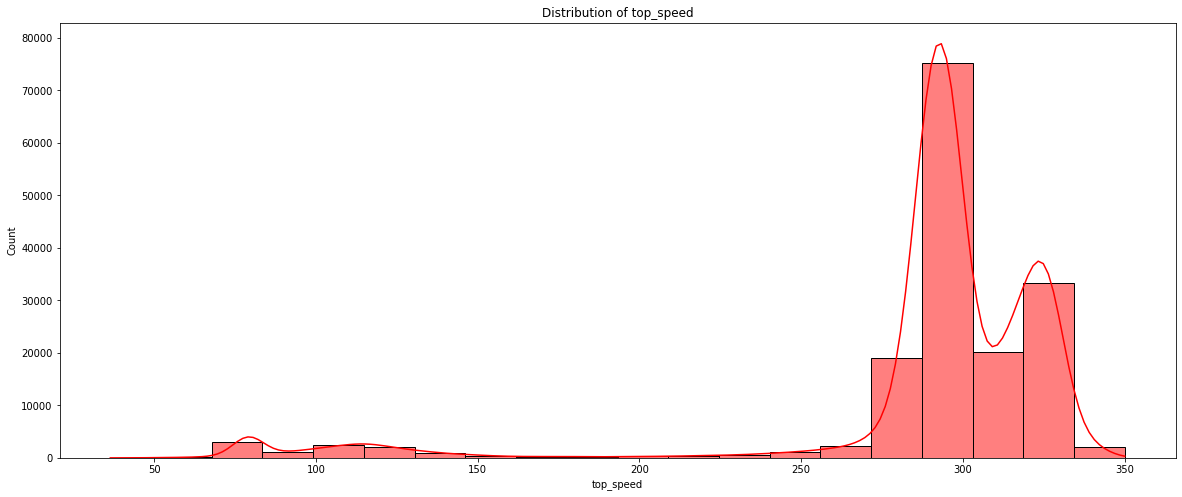

In [96]:
plt.figure(figsize=(20,8))
ax = sns.histplot(data=circuit_LE_MANS,x='top_speed',kde=True,bins=20, color='r')
ax.set(xlabel='top_speed',ylabel='Count',title='Distribution of top_speed',)
plt.show()

The above shows we have outliers, but the first job is fill the null value of feature

In [97]:
circuit_LE_MANS.top_speed.mean()

288.38731541838496

In [98]:
# I use the mean() value to fill null value in feature top_speed
circuit_LE_MANS['top_speed'] = circuit_LE_MANS.top_speed.fillna(value= circuit_LE_MANS.top_speed.mean())

In [99]:
circuit_LE_MANS.top_speed.isnull().sum()

0

In [100]:
circuit_LE_MANS.group.describe()

count     19664
unique        3
top           H
freq      15859
Name: group, dtype: object

According to definition of feature 'group' it just valid for specific value so, I drop it from 'circuit_LE_MANS' dataset

In [101]:
circuit_LE_MANS.drop(['group'],axis=1,inplace = True)

In [102]:
circuit_LE_MANS.isnull().sum()

number                         0
driver_number                  0
lap_number                     0
lap_time                       0
lap_improvement                0
crossing_finish_line_in_pit    0
s1                             0
s1_improvement                 0
s2                             0
s2_improvement                 0
s3                             0
s3_improvement                 0
kph                            0
hour                           0
s1_large                       0
s2_large                       0
s3_large                       0
top_speed                      0
driver_name                    0
pit_time                       0
class                          0
team                           0
manufacturer                   0
season                         0
circuit                        0
round                          0
t6                             0
t7                             0
porsche                        0
ford                           0
vehicle   

###### back to main dataset and follow different cleaning part with it

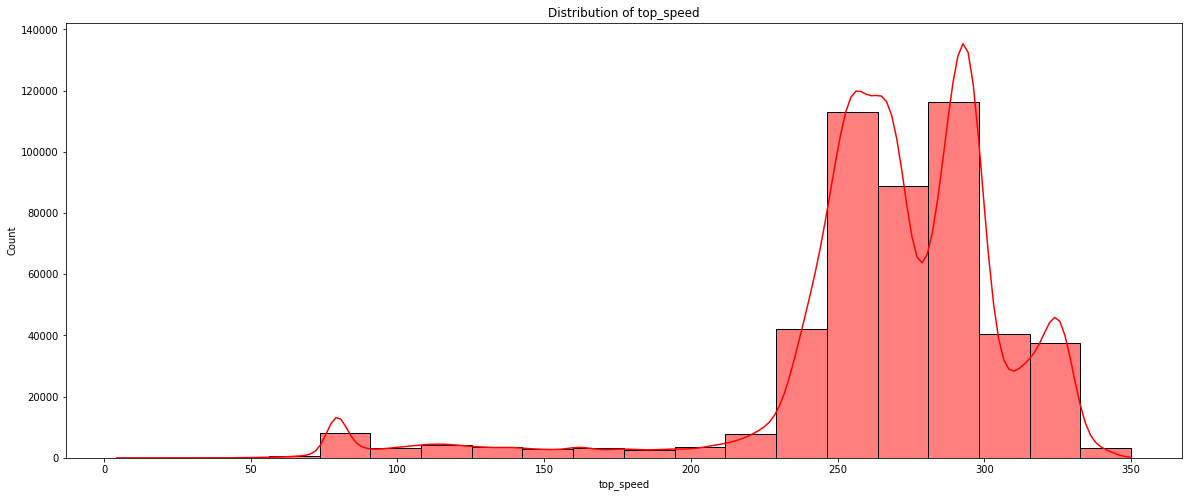

In [103]:
plt.figure(figsize=(20,8))
ax = sns.histplot(data=dataset,x='top_speed',kde=True,bins=20, color='r')
ax.set(xlabel='top_speed',ylabel='Count',title='Distribution of top_speed',)
plt.show()

In [104]:
dataset.top_speed.describe()

count    481229.000000
mean        266.697997
std          45.438061
min           4.300000
25%         253.000000
50%         270.700000
75%         293.200000
max         350.100000
Name: top_speed, dtype: float64

In [105]:
dataset['top_speed'] = dataset.top_speed.fillna(value= dataset.top_speed.mean())

In [106]:
dataset.isnull().sum()

number                              0
driver_number                       0
lap_number                          0
lap_time                            0
lap_improvement                     0
crossing_finish_line_in_pit         0
s1                                  0
s1_improvement                      0
s2                                  0
s2_improvement                      0
s3                                  0
s3_improvement                      0
kph                                 0
hour                                0
s1_large                            0
s2_large                            0
s3_large                            0
top_speed                           0
driver_name                         0
pit_time                            0
class                               0
group                          406557
team                                0
manufacturer                        0
season                              0
circuit                             0
round       

In [107]:
dataset.season.value_counts().sort_index()

2012         54432
2013         34083
2014         43644
2015         52702
2016         62095
2017         53044
2021         43386
2022          9792
2017           920
2018-2019    69443
2019-2020    52972
2021          6665
Name: season, dtype: int64

In [108]:
# fix white space in 'season' feature, creating a parallel to work to avoid any need to start from first
dataset_test = dataset['season'].copy()

In [109]:
season_replace = {'2018-2019':'2018', '2019-2020':'2019'}
dataset['season'].replace(season_replace, inplace = True)
dataset['season'] = dataset['season'].astype('int64')
dataset['season'] = dataset['season'].astype('category')
dataset_test.value_counts().sort_index()

2012         54432
2013         34083
2014         43644
2015         52702
2016         62095
2017         53044
2021         43386
2022          9792
2017           920
2018-2019    69443
2019-2020    52972
2021          6665
Name: season, dtype: int64

In [110]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483178 entries, 0 to 483177
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   number                       483178 non-null  int64         
 1   driver_number                483178 non-null  int64         
 2   lap_number                   483178 non-null  int64         
 3   lap_time                     483178 non-null  datetime64[ns]
 4   lap_improvement              483178 non-null  int64         
 5   crossing_finish_line_in_pit  483178 non-null  category      
 6   s1                           483178 non-null  datetime64[ns]
 7   s1_improvement               483178 non-null  int64         
 8   s2                           483178 non-null  datetime64[ns]
 9   s2_improvement               483178 non-null  int64         
 10  s3                           483178 non-null  datetime64[ns]
 11  s3_improvement            

In [111]:
season_2022_dataset = dataset.loc[dataset.season == 2022]

In [112]:
season_2022_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9792 entries, 473386 to 483177
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   number                       9792 non-null   int64         
 1   driver_number                9792 non-null   int64         
 2   lap_number                   9792 non-null   int64         
 3   lap_time                     9792 non-null   datetime64[ns]
 4   lap_improvement              9792 non-null   int64         
 5   crossing_finish_line_in_pit  9792 non-null   category      
 6   s1                           9792 non-null   datetime64[ns]
 7   s1_improvement               9792 non-null   int64         
 8   s2                           9792 non-null   datetime64[ns]
 9   s2_improvement               9792 non-null   int64         
 10  s3                           9792 non-null   datetime64[ns]
 11  s3_improvement               9792 no

In [113]:
# drop 'flag_at_fl' from main dataset
dataset.drop(['flag_at_fl'],axis =1, inplace = True)

In [114]:
# check the distribution of feature'group' on different season
dataset.groupby('season')['group'].value_counts().unstack()

,H,L,P/A
season,,,
2012,6426,0,0
2013,5659,1921,0
2014,9978,2610,0
2015,11790,0,0
2016,10934,0,0
2017,7520,0,0
2018,3717,0,0
2019,3440,0,0
2021,2892,0,8212


In [115]:
dataset.group.value_counts()

H      62792
P/A     9298
L       4531
Name: group, dtype: int64

group: the group of the car that set the lap time, only applicable to LMP1s and LMP2 Pro/Am (2021 season?)

In [116]:
dataset['class'].value_counts()

LMP2              159033
LMGTE Am          125119
LMGTE Pro          99361
LMP1               79703
LMP1-H              9978
HYPERCAR            6645
LMP1-L              2610
CDNT                 395
INNOVATIVE CAR       334
Name: class, dtype: int64

In [117]:
dataset.groupby('class')['group'].describe()

,count,unique,top,freq
class,,,,
CDNT,0,0,NaN,NaN
HYPERCAR,3328,1,H,3328
INNOVATIVE CAR,0,0,NaN,NaN
LMGTE Am,0,0,NaN,NaN
LMGTE Pro,0,0,NaN,NaN
LMP1,51407,2,H,49486
LMP1-H,9978,1,H,9978
LMP1-L,2610,1,L,2610
LMP2,9298,1,P/A,9298


In [118]:
l_group_f = ['LMP1','LMP1_H','LMP1_L','LMP2']

In [119]:
dataset_group = dataset.loc[(dataset['class'] == 'LMP1') ^ (dataset['class'] == 'LMP1_H') ^
                            (dataset['class'] == 'LMP2') ^ (dataset['class'] == 'LMP1_L')]

In [120]:
dataset_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238736 entries, 11 to 483177
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   number                       238736 non-null  int64         
 1   driver_number                238736 non-null  int64         
 2   lap_number                   238736 non-null  int64         
 3   lap_time                     238736 non-null  datetime64[ns]
 4   lap_improvement              238736 non-null  int64         
 5   crossing_finish_line_in_pit  238736 non-null  category      
 6   s1                           238736 non-null  datetime64[ns]
 7   s1_improvement               238736 non-null  int64         
 8   s2                           238736 non-null  datetime64[ns]
 9   s2_improvement               238736 non-null  int64         
 10  s3                           238736 non-null  datetime64[ns]
 11  s3_improvement           

In [121]:
# according to definition of group other values are not valid, sodrop from main dataset
dataset.drop(['group'],axis=1,inplace=True)

In [122]:
dataset.isnull().sum()

number                         0
driver_number                  0
lap_number                     0
lap_time                       0
lap_improvement                0
crossing_finish_line_in_pit    0
s1                             0
s1_improvement                 0
s2                             0
s2_improvement                 0
s3                             0
s3_improvement                 0
kph                            0
hour                           0
s1_large                       0
s2_large                       0
s3_large                       0
top_speed                      0
driver_name                    0
pit_time                       0
class                          0
team                           0
manufacturer                   0
season                         0
circuit                        0
round                          0
vehicle                        0
team_no                        0
lap_time_ms                    0
lap_time_s                     0
engine    

#### check to start outliers in numberics value

In [123]:
dataset_numberic = dataset.select_dtypes(include=['float64','int64'])

In [124]:
dataset_numberic

,number,driver_number,lap_number,lap_improvement,s1_improvement,s2_improvement,s3_improvement,kph,top_speed,round,...,team_stint_no,elapsed_ms,position,class_position,interval_ms,interval,gap,class_interval,class_gap,elapsed_manual_ms
data_index,,,,,,,,,,,,,,,,,,,,,
0,57,1,1,0,0,0,0,151.4,247.6,1,...,1,143141,20,1,349,0.349,26.922,0.000,0.000,143.141
1,88,2,1,0,0,0,0,150.4,220.4,1,...,1,144016,21,2,875,0.875,27.797,0.875,0.875,144.016
2,50,2,1,0,0,0,0,149.1,233.6,1,...,1,145278,22,3,1262,1.262,29.059,1.262,2.137,145.278
3,70,2,1,0,0,0,0,148.8,218.3,1,...,1,145548,23,4,270,0.270,29.329,0.270,2.407,145.548
4,61,2,1,0,0,0,0,148.5,224.0,1,...,1,145859,24,5,311,0.311,29.640,0.311,2.718,145.859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483173,31,3,103,0,0,0,0,193.4,278.6,2,...,8,21697237,3,1,38712,38.712,66.185,0.000,0.000,21697.237
483174,41,2,103,0,0,0,0,192.8,289.7,2,...,8,21731728,4,2,34491,34.491,100.676,34.491,34.491,21731.728
483175,38,3,103,0,0,0,0,193.7,296.1,2,...,8,21739623,5,3,7895,7.895,108.571,7.895,42.386,21739.623


In [125]:
dataset_numberic.describe()

,number,driver_number,lap_number,lap_improvement,s1_improvement,s2_improvement,s3_improvement,kph,top_speed,round,...,team_stint_no,elapsed_ms,position,class_position,interval_ms,interval,gap,class_interval,class_gap,elapsed_manual_ms
count,483178.000000,483178.000000,483178.000000,483178.000000,483178.000000,483178.000000,483178.000000,483178.000000,483178.000000,483178.000000,...,483178.000000,4.831780e+05,483178.000000,483178.000000,4.831780e+05,483178.000000,483178.000000,483178.000000,483178.000000,483178.000000
mean,52.826095,1.312022,116.093390,0.010245,0.019144,0.019173,0.019177,178.260105,266.697997,4.317558,...,7.789138,2.170587e+07,18.088019,5.491817,1.593743e+05,159.374292,2138.740790,132.095857,410.848462,21705.868838
std,62.866806,0.933990,81.877203,0.144374,0.171678,0.171820,0.171831,32.178606,45.346326,2.281900,...,7.655251,2.122628e+07,12.366905,4.055323,6.073697e+05,607.369652,2855.413362,592.527163,992.041863,21226.276788
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.900000,4.300000,1.000000,...,0.000000,8.438800e+04,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,84.388000
25%,25.000000,1.000000,51.000000,0.000000,0.000000,0.000000,0.000000,160.700000,253.200000,3.000000,...,3.000000,7.286084e+06,8.000000,2.000000,6.630000e+03,6.630000,324.150000,2.623000,14.806000,7286.084250
50%,47.000000,1.000000,103.000000,0.000000,0.000000,0.000000,0.000000,176.800000,270.200000,4.000000,...,5.000000,1.473822e+07,16.000000,5.000000,3.123400e+04,31.234000,1142.126500,19.887000,90.518000,14738.215000
75%,77.000000,2.000000,163.000000,0.000000,0.000000,0.000000,0.000000,202.800000,293.200000,6.000000,...,9.000000,2.526378e+07,25.000000,7.000000,1.151480e+05,115.148000,2556.470000,81.617000,352.104250,25263.779500
max,777.000000,3.000000,395.000000,3.000000,3.000000,3.000000,3.000000,248.600000,350.100000,9.000000,...,43.000000,8.692520e+07,61.000000,25.000000,2.455741e+07,24557.407000,40495.937000,24557.407000,27002.532000,86925.196000


According to above describe I understood that my formula to create new feature elapsed_manual_ms has issue and it didn't multi by 1000

In [126]:
dataset['elapsed_manual_ms'] = dataset.elapsed_manual_ms.apply(lambda x: x*1000)

In [129]:
dataset[['elapsed_manual_ms','elapsed_ms']].describe()

,elapsed_manual_ms,elapsed_ms
count,4.831780e+05,4.831780e+05
mean,2.170587e+07,2.170587e+07
std,2.122628e+07,2.122628e+07
min,8.438800e+04,8.438800e+04
25%,7.286084e+06,7.286084e+06
50%,1.473822e+07,1.473822e+07
75%,2.526378e+07,2.526378e+07
max,8.692520e+07,8.692520e+07


based on five value summary to features 'elapsed_manual_ms' and 'elapsed_ms' are equal,drop one of them

In [130]:
dataset.drop('elapsed_manual_ms', axis= 1, inplace = True)

In [131]:
dataset[['interval_ms','interval']].describe()

,interval_ms,interval
count,4.831780e+05,483178.000000
mean,1.593743e+05,159.374292
std,6.073697e+05,607.369652
min,0.000000e+00,0.000000
25%,6.630000e+03,6.630000
50%,3.123400e+04,31.234000
75%,1.151480e+05,115.148000
max,2.455741e+07,24557.407000


In [132]:
# they are similar drop one of them
dataset.drop('interval',axis = 1, inplace = True)

In [135]:
dataset.s3_improvement.value_counts()

0    476427
1      4310
2      2367
3        74
Name: s3_improvement, dtype: int64

##### I am going to change the data type of 'number' , 'driver_number', 'lap_number', 's1_improvement', 's2_improvement', 's3_improvement', 'lap_improvement', 'class_position', 'position', 'team_stint_no', 'round'

In [140]:
change_int_cat = [ 'number' , 'driver_number', 'lap_number', 's1_improvement', 's2_improvement', 's3_improvement',
                  'lap_improvement', 'class_position', 'position', 'team_stint_no', 'round', 'driver_stint_no']

In [141]:
dataset[change_int_cat] = dataset[change_int_cat].astype('category')

In [142]:
dataset_numberic = dataset.select_dtypes(include=['float64','int64'])

In [143]:
dataset_numberic.describe()

,kph,top_speed,lap_time_ms,lap_time_s,elapsed_ms,interval_ms,gap,class_interval,class_gap
count,483178.000000,483178.000000,4.831780e+05,483178.000000,4.831780e+05,4.831780e+05,483178.000000,483178.000000,483178.000000
mean,178.260105,266.697997,1.713944e+05,171.394436,2.170587e+07,1.593743e+05,2138.740790,132.095857,410.848462
std,32.178606,45.346326,1.493962e+05,149.396224,2.122628e+07,6.073697e+05,2855.413362,592.527163,992.041863
min,1.900000,4.300000,7.836700e+04,78.367000,8.438800e+04,0.000000e+00,0.000000,0.000000,0.000000
25%,160.700000,253.200000,1.135890e+05,113.589000,7.286084e+06,6.630000e+03,324.150000,2.623000,14.806000
50%,176.800000,270.200000,1.287170e+05,128.717000,1.473822e+07,3.123400e+04,1142.126500,19.887000,90.518000
75%,202.800000,293.200000,2.248518e+05,224.851750,2.526378e+07,1.151480e+05,2556.470000,81.617000,352.104250
max,248.600000,350.100000,2.064157e+07,20641.566000,8.692520e+07,2.455741e+07,40495.937000,24557.407000,27002.532000


In [144]:
dataset[['lap_time_s','lap_time_ms']].describe()

,lap_time_s,lap_time_ms
count,483178.000000,4.831780e+05
mean,171.394436,1.713944e+05
std,149.396224,1.493962e+05
min,78.367000,7.836700e+04
25%,113.589000,1.135890e+05
50%,128.717000,1.287170e+05
75%,224.851750,2.248518e+05
max,20641.566000,2.064157e+07


In [145]:
dataset.drop('lap_time_s', axis= 1, inplace = True)

In [147]:
dataset_numberic = dataset.select_dtypes(include=['float64','int64'])
dataset_numberic.describe()

,kph,top_speed,lap_time_ms,elapsed_ms,interval_ms,gap,class_interval,class_gap
count,483178.000000,483178.000000,4.831780e+05,4.831780e+05,4.831780e+05,483178.000000,483178.000000,483178.000000
mean,178.260105,266.697997,1.713944e+05,2.170587e+07,1.593743e+05,2138.740790,132.095857,410.848462
std,32.178606,45.346326,1.493962e+05,2.122628e+07,6.073697e+05,2855.413362,592.527163,992.041863
min,1.900000,4.300000,7.836700e+04,8.438800e+04,0.000000e+00,0.000000,0.000000,0.000000
25%,160.700000,253.200000,1.135890e+05,7.286084e+06,6.630000e+03,324.150000,2.623000,14.806000
50%,176.800000,270.200000,1.287170e+05,1.473822e+07,3.123400e+04,1142.126500,19.887000,90.518000
75%,202.800000,293.200000,2.248518e+05,2.526378e+07,1.151480e+05,2556.470000,81.617000,352.104250
max,248.600000,350.100000,2.064157e+07,8.692520e+07,2.455741e+07,40495.937000,24557.407000,27002.532000


In [149]:
import numpy as np

In [163]:
distribution_range = np.arange(0.75,1.02,0.05)
dataset_numberic.quantile([0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

,kph,top_speed,lap_time_ms,elapsed_ms,interval_ms,gap,class_interval,class_gap
0.75,202.8,293.2,224851.75,25263779.50,115148.00,2556.47000,81.6170,352.10425
0.80,206.6,296.2,233693.00,34429884.20,155480.00,3104.14060,111.4058,496.64480
0.85,210.5,300.0,238813.00,45971303.90,219318.45,4199.81505,158.9729,728.21860
0.90,219.1,311.8,246416.30,58787453.10,340099.20,5983.88300,249.2808,1094.88770
0.95,228.6,323.3,288449.35,72589633.95,647885.40,8572.02455,523.5397,1981.49175
1.00,248.6,350.1,20641566.00,86925196.00,24557407.00,40495.93700,24557.4070,27002.53200


according to above result 'lap_time_ms', 'elapsed_ms', 'interval_ms', 'gap', 'class_interval', 'class_gap' has some outliers

In [164]:
import statsmodels.api as sm

In [165]:
def getlm(df):
    Y = df.gap
    X = df[['interval_ms','elapsed_ms','lap_time_ms']]
    X = sm.add_constant(X)
    return sm.OLS(Y, X).fit()

In [168]:
lm = getlm(dataset_numberic)

In [173]:
def find_ZScore_Outliers(df, columnName):
    out=[]
    outValues=[]
    dfOrig = df
    df = df[columnName]
    m = np.mean(df)
    s = np.std(df)
    
    for val in df:
        z = (val - m) / s
        if (np.abs(z) > 3):
            out.append(val)
            outValues.append((dfOrig.loc[dfOrig[columnName] == val]).index.values[0])

    return out, outValues

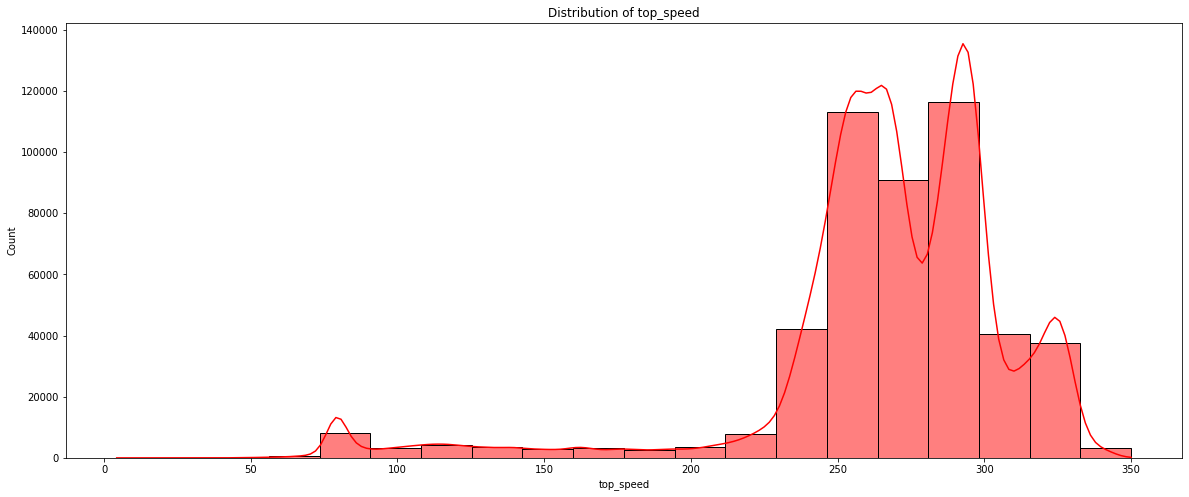

In [176]:
plt.figure(figsize=(20,8))
ax = sns.histplot(data=dataset,x='top_speed',kde=True,bins=20, color='r')
ax.set(xlabel='top_speed',ylabel='Count',title='Distribution of top_speed',)
plt.show()

In [180]:
# I choose Z score because the graph seems to normal
_ , loc = find_ZScore_Outliers(dataset, 'top_speed')

In [179]:
dataset.loc[loc]

,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,...,driver_stint,team_stint_no,team_stint,elapsed_ms,position,class_position,interval_ms,gap,class_interval,class_gap
data_index,,,,,,,,,,,,,,,,,,,,,
144,61,2,6,1900-01-01 00:11:18.443,0,B,1900-01-01 00:00:37.371,0,1900-01-01 00:06:29.161,0,...,Rui Aguas Stint #1,1,AF Corse-Waltrip #61 Stint #1,1325666,26,5,552398,662.486,552.398,558.403
177,77,0,7,1900-01-01 00:02:15.251,0,A,1900-01-01 00:00:37.181,0,1900-01-01 00:00:43.844,0,...,Marc Lieb Stint #1,1,Team Felbermayr-Proton #77 Stint #1,908519,25,4,683,135.709,0.683,7.208
199,70,2,8,1900-01-01 00:03:36.734,0,A,1900-01-01 00:01:01.029,0,1900-01-01 00:01:14.082,0,...,Pascal Gibon Stint #1,1,Larbre Competition #70 Stint #1,1124570,25,4,8599,221.791,8.599,99.708
224,88,2,9,1900-01-01 00:02:33.464,0,A,1900-01-01 00:00:38.075,0,1900-01-01 00:00:43.535,0,...,Paolo Ruberti Stint #1,1,Team Felbermayr-Proton #88 Stint #1,1177555,21,1,1101,55.892,0.000,0.000
230,59,1,9,1900-01-01 00:02:39.485,0,A,1900-01-01 00:00:36.896,0,1900-01-01 00:00:44.345,0,...,Jaime Melo Stint #1,1,Luxury Racing #59 Stint #1,1167145,17,1,10377,45.482,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72849,2,2,278,1900-01-01 00:07:29.080,0,A,1900-01-01 00:01:01.868,0,1900-01-01 00:03:10.778,0,...,Allan McNISH Stint #9,27,Audi Sport Team Joest #2 Stint #27,69104020,1,1,0,0.000,0.000,0.000
97069,90,2,23,1900-01-01 00:07:46.323,0,A,1900-01-01 00:01:13.919,0,1900-01-01 00:03:19.326,0,...,Paolo RUBERTI Stint #3,3,8 Star Motorsports #90 Stint #3,6450266,44,13,2079,1619.362,2.079,452.044
59189,8,1,30,1900-01-01 00:04:39.492,0,A,1900-01-01 00:01:27.027,0,1900-01-01 00:01:53.328,0,...,Sébastien BUEMI Stint #2,2,Toyota Racing #8 Stint #2,3996749,4,4,1244,59.959,1.244,59.959


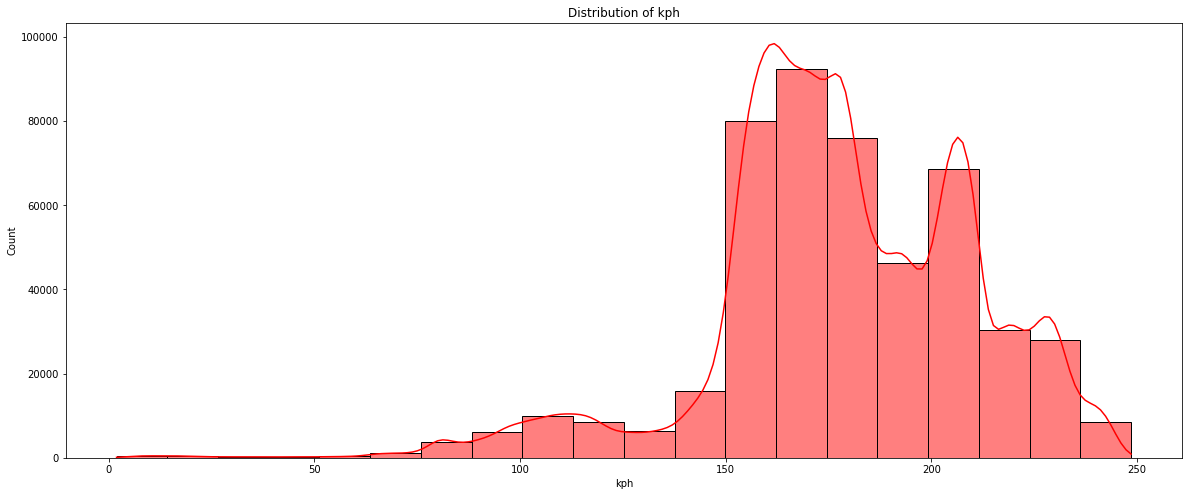

In [186]:
plt.figure(figsize=(20,8))
ax = sns.histplot(data=dataset,x='kph',kde=True,bins=20, color='r')
ax.set(xlabel='kph',ylabel='Count',title='Distribution of kph',)
plt.show()

In [182]:
def IQR(data):
    first_q, third_q = data.quantile(0.25), data.quantile(0.75)
    OutlierRange = (third_q - first_q)*1.5
    high_outlier = third_q + OutlierRange
    low_outlier = first_q - OutlierRange
    return low_outlier, high_outlier

In [183]:
low_outlier, high_outlier = IQR(dataset.kph)

In [185]:
dataset.loc[(dataset.kph > high_outlier) | (dataset.kph < low_outlier)]

,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,...,driver_stint,team_stint_no,team_stint,elapsed_ms,position,class_position,interval_ms,gap,class_interval,class_gap
data_index,,,,,,,,,,,,,,,,,,,,,
5,55,2,1,1900-01-01 01:05:11.201,0,B,1900-01-01 00:00:00.000,0,1900-01-01 00:00:00.000,0,...,Bill Binnie Stint #1,1,JWA-Avila #55 Stint #1,3911201,28,6,3754842,3794.982,3754.842,3757.560
33,55,0,2,1900-01-01 00:25:18.150,0,B,1900-01-01 00:01:03.145,0,1900-01-01 00:00:46.572,0,...,Jöel Camathias Stint #1,2,JWA-Avila #55 Stint #2,5429351,28,6,5146322,5202.861,5146.322,5150.879
144,61,2,6,1900-01-01 00:11:18.443,0,B,1900-01-01 00:00:37.371,0,1900-01-01 00:06:29.161,0,...,Rui Aguas Stint #1,1,AF Corse-Waltrip #61 Stint #1,1325666,26,5,552398,662.486,552.398,558.403
150,51,2,6,1900-01-01 00:46:48.367,0,A,1900-01-01 00:45:19.732,0,1900-01-01 00:00:44.332,0,...,Toni Vilander Stint #2,2,AF Corse #51 Stint #2,3464086,27,5,2138420,2800.906,2138.420,2146.542
172,61,2,7,1900-01-01 00:16:38.935,0,A,1900-01-01 00:15:06.833,0,1900-01-01 00:00:47.245,0,...,Rui Aguas Stint #2,2,AF Corse-Waltrip #61 Stint #2,2324601,26,5,1416082,1551.791,1416.082,1431.481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483061,5,3,97,1900-01-01 00:05:14.637,0,A,1900-01-01 00:01:41.340,0,1900-01-01 00:02:07.648,0,...,Felipe NASR Stint #3,7,Team Penske #5 Stint #7,20926724,6,4,2466,282.408,2.466,131.201
483062,22,1,97,1900-01-01 00:05:27.545,0,A,1900-01-01 00:01:52.578,0,1900-01-01 00:02:08.346,0,...,Philip HANSON Stint #4,9,United Autosports USA #22 Stint #9,20936642,7,5,9918,292.326,9.918,141.119
483063,23,2,97,1900-01-01 00:05:28.407,0,A,1900-01-01 00:01:58.506,0,1900-01-01 00:02:08.370,0,...,Oliver JARVIS Stint #3,9,United Autosports USA #23 Stint #9,20992694,9,6,1,348.378,0.001,141.120


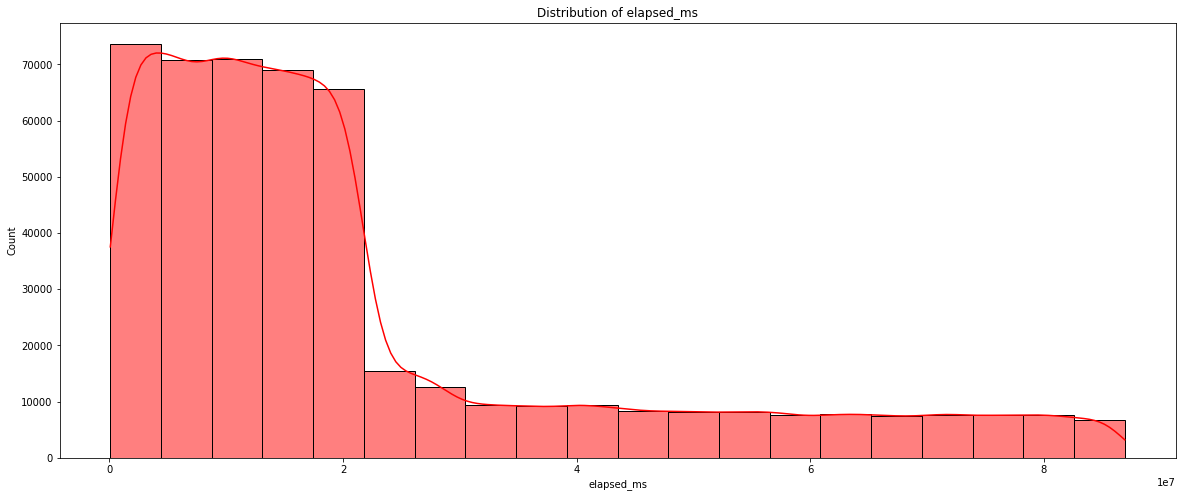

In [188]:
plt.figure(figsize=(20,8))
ax = sns.histplot(data=dataset,x='elapsed_ms',kde=True,bins=20, color='r')
ax.set(xlabel='elapsed_ms',ylabel='Count',title='Distribution of elapsed_ms',)
plt.show()

In [189]:
low_outlier, high_outlier = IQR(dataset.elapsed_ms)
dataset.loc[(dataset.elapsed_ms > high_outlier) | (dataset.elapsed_ms < low_outlier)]

,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,...,driver_stint,team_stint_no,team_stint,elapsed_ms,position,class_position,interval_ms,gap,class_interval,class_gap
data_index,,,,,,,,,,,,,,,,,,,,,
21540,74,0,165,1900-01-01 00:04:12.305,0,A,1900-01-01 00:00:39.769,0,1900-01-01 00:01:36.348,0,...,Oliver Gavin Stint #8,17,Corvette Racing #74 Stint #17,52373209,44,8,1317481,14211.679,1317.481,1842.851
21584,74,0,166,1900-01-01 00:04:06.868,0,A,1900-01-01 00:00:40.974,0,1900-01-01 00:01:34.702,0,...,Oliver Gavin Stint #8,17,Corvette Racing #74 Stint #17,52620077,44,8,995154,14247.027,995.154,1546.818
21628,74,0,167,1900-01-01 00:04:00.785,0,A,1900-01-01 00:00:37.768,0,1900-01-01 00:01:32.947,0,...,Oliver Gavin Stint #8,17,Corvette Racing #74 Stint #17,52860862,44,8,802526,14275.884,802.526,1381.139
21664,83,1,168,1900-01-01 00:04:14.671,0,A,1900-01-01 00:00:41.907,0,1900-01-01 00:01:37.577,0,...,Alain Ferte Stint #7,14,JMB Racing #83 Stint #14,52313007,43,10,4048199,13516.599,4048.199,5984.361
21672,74,0,168,1900-01-01 00:03:56.835,2,A,1900-01-01 00:00:37.342,0,1900-01-01 00:01:31.526,0,...,Oliver Gavin Stint #8,17,Corvette Racing #74 Stint #17,53097697,44,8,784690,14301.289,784.690,1887.962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460969,8,2,368,1900-01-01 00:03:36.815,0,A,1900-01-01 00:00:34.567,0,1900-01-01 00:01:22.684,0,...,Kazuki NAKAJIMA Stint #14,38,Toyota Gazoo Racing #8 Stint #38,86231589,2,2,489349,489.349,489.349,489.349
460970,7,2,369,1900-01-01 00:04:32.105,0,A,1900-01-01 00:01:28.992,0,1900-01-01 00:01:21.862,0,...,Kamui KOBAYASHI Stint #11,34,Toyota Gazoo Racing #7 Stint #34,86014345,1,1,0,0.000,0.000,0.000
460971,8,2,369,1900-01-01 00:03:39.272,0,A,1900-01-01 00:00:35.414,0,1900-01-01 00:01:21.990,0,...,Kazuki NAKAJIMA Stint #14,38,Toyota Gazoo Racing #8 Stint #38,86450861,2,2,436516,436.516,436.516,436.516


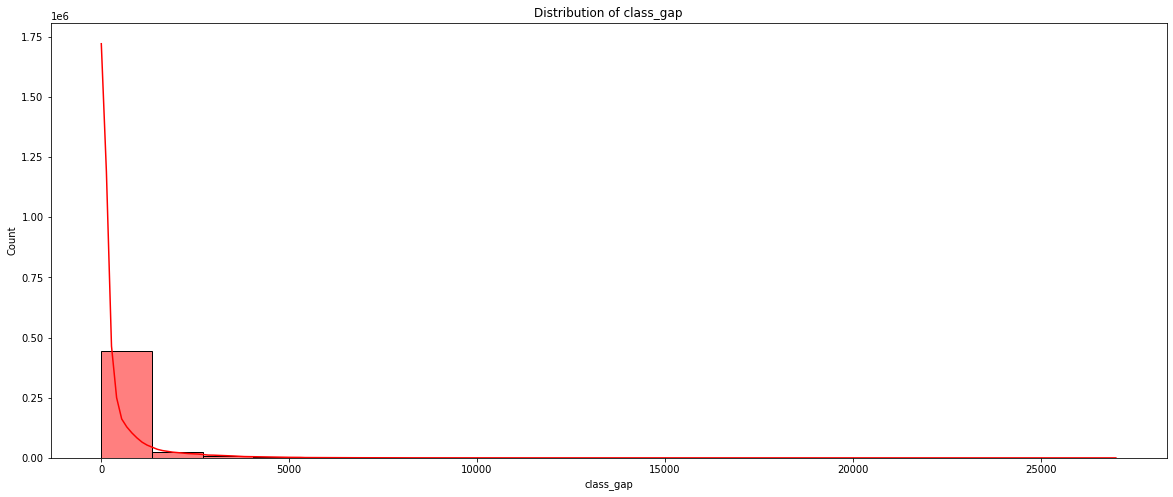

In [193]:
plt.figure(figsize=(20,8))
ax = sns.histplot(data=dataset,x='class_gap',kde=True,bins=20, color='r')
ax.set(xlabel='class_gap',ylabel='Count',title='Distribution of class_gap',)
plt.show()

###### the remaind numberic features doesn't have normal distribution, so I check the correlation between them and if they have good correlation using KNN method to find outliers of the group

In [194]:
check_corr_l = ['lap_time_ms', 'interval_ms', 'gap', 'class_interval', 'class_gap']

In [195]:
corr_numberic_data = dataset[check_corr_l].corr(method='pearson')

In [196]:
corr_numberic_data

,lap_time_ms,interval_ms,gap,class_interval,class_gap
lap_time_ms,1.000000,0.145034,0.291663,0.146084,0.227579
interval_ms,0.145034,1.000000,0.428513,0.965550,0.739698
gap,0.291663,0.428513,1.000000,0.428132,0.666583
class_interval,0.146084,0.965550,0.428132,1.000000,0.777293
class_gap,0.227579,0.739698,0.666583,0.777293,1.000000


Based on above result, just feature 'lap_time_ms' has less correlation with others so I will use the KNN method for other one

In [198]:
pip install pyod

     ------------------------------------ 120.6/120.6 KB 441.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.4/2.4 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 1.6 MB/s eta 0:00:00
Using legacy 'setup.py install' for pyod, since package 'wheel' is not installed.
  Running setup.py install for pyod: started
  Running setup.py install for pyod: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\mehra\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [199]:
from pyod.models.knn import KNN
from sklearn.preprocessing import StandardScaler

In [200]:
KNN_l = ['interval_ms', 'gap', 'class_interval', 'class_gap']

In [201]:
standardizer = StandardScaler()
dataset_KNN = dataset[KNN_l]
dataset_KNNSTD = standardizer.fit_transform(dataset_KNN)

In [202]:
clf_name = 'KNN'
clf= KNN(contamination=0.1)
clf.fit(dataset_KNNSTD)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [203]:
y_pred = clf.labels_
y_scores = clf.decision_scores_
y_pred
y_scores

array([0.00048771, 0.00040306, 0.00069609, ..., 0.00234859, 0.00241376,
       0.00200444])

In [204]:
dataset_KNNSTD = pd.DataFrame(dataset_KNNSTD)
predictions = pd.DataFrame(zip(y_pred, y_scores), columns=['outlier', 'scores'], index=dataset_KNNSTD.index)

In [207]:
predictions.sample(10)

,outlier,scores
255891,0,0.008233
478638,0,0.006739
191972,0,0.004481
19381,0,0.010752
283611,0,0.010051
289835,0,0.000000
411009,0,0.033772
400270,0,0.001662
21813,1,0.075097
474137,0,0.001426


In [208]:
predictions.outlier.value_counts()

0    434860
1     48318
Name: outlier, dtype: int64

In [209]:
predictions.groupby(['outlier'])[['scores']].agg(['min', 'median', 'max'])

scores                    
              min    median       max
outlier                              
0        0.000000  0.005261  0.045267
1        0.045267  0.073674  8.532650

In [210]:
dataset.loc[predictions.outlier == 1]

,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,...,driver_stint,team_stint_no,team_stint,elapsed_ms,position,class_position,interval_ms,gap,class_interval,class_gap
data_index,,,,,,,,,,,,,,,,,,,,,
5,55,2,1,1900-01-01 01:05:11.201,0,B,1900-01-01 00:00:00.000,0,1900-01-01 00:00:00.000,0,...,Bill Binnie Stint #1,1,JWA-Avila #55 Stint #1,3911201,28,6,3754842,3794.982,3754.842,3757.560
33,55,0,2,1900-01-01 00:25:18.150,0,B,1900-01-01 00:01:03.145,0,1900-01-01 00:00:46.572,0,...,Jöel Camathias Stint #1,2,JWA-Avila #55 Stint #2,5429351,28,6,5146322,5202.861,5146.322,5150.879
61,55,0,3,1900-01-01 00:02:31.315,0,A,1900-01-01 00:01:01.260,0,1900-01-01 00:00:44.303,0,...,Jöel Camathias Stint #2,3,JWA-Avila #55 Stint #3,5580666,28,6,5173919,5244.895,5173.919,5178.594
89,55,0,4,1900-01-01 00:02:07.136,0,A,1900-01-01 00:00:38.197,0,1900-01-01 00:00:43.710,0,...,Jöel Camathias Stint #2,3,JWA-Avila #55 Stint #3,5707802,28,6,5181686,5263.140,5181.686,5186.718
117,55,0,5,1900-01-01 00:02:07.571,0,A,1900-01-01 00:00:37.770,0,1900-01-01 00:00:44.783,0,...,Jöel Camathias Stint #2,3,JWA-Avila #55 Stint #3,5835373,28,6,5179654,5282.321,5179.654,5185.558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482869,777,3,91,1900-01-01 00:05:12.829,0,A,1900-01-01 00:01:40.086,0,1900-01-01 00:02:07.650,0,...,Charles FAGG Stint #3,7,D'Station Racing #777 Stint #7,20627286,26,6,375746,992.802,375.746,430.196
482875,71,1,91,1900-01-01 00:02:28.405,0,A,1900-01-01 00:00:41.973,0,1900-01-01 00:01:08.958,1,...,Franck DEZOTEUX Stint #4,8,Spirit of Race #71 Stint #8,21734390,32,12,543681,2099.906,543.681,1537.300
482901,777,3,92,1900-01-01 00:05:15.391,0,A,1900-01-01 00:01:41.551,0,1900-01-01 00:02:08.179,0,...,Charles FAGG Stint #3,7,D'Station Racing #777 Stint #7,20942677,26,6,460325,1167.781,460.325,587.386


### Check some categorical data

In [211]:
dataset_cat = dataset.loc[:,dataset.dtypes == 'category']

In [213]:
dataset_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483178 entries, 0 to 483177
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   number                       483178 non-null  category
 1   driver_number                483178 non-null  category
 2   lap_number                   483178 non-null  category
 3   lap_improvement              483178 non-null  category
 4   crossing_finish_line_in_pit  483178 non-null  category
 5   s1_improvement               483178 non-null  category
 6   s2_improvement               483178 non-null  category
 7   s3_improvement               483178 non-null  category
 8   driver_name                  483178 non-null  category
 9   class                        483178 non-null  category
 10  team                         483178 non-null  category
 11  manufacturer                 483178 non-null  category
 12  season                       483178 non-null

In [215]:
dataset.groupby('lap_number')['top_speed'].agg(['min','max','mean','count','sum']).max()

min         314.500000
max         350.100000
mean        321.947368
count      2441.000000
sum      646862.055934
dtype: float64

In [217]:
dataset.groupby('engine')[['top_speed', 'gap']].agg(['min','max','mean','count','sum'])

top_speed                                             gap  \
                   min    max        mean  count           sum     min   
engine                                                                   
AER               50.4  350.1  284.053283  10063  2.858428e+06   0.000   
Aston Martin      44.7  306.5  253.071526  43200  1.093269e+07   0.661   
Audi              49.1  345.6  280.649908  19659  5.517297e+06   0.000   
BMW               63.5  305.6  256.465804   3106  7.965828e+05   3.783   
Chevrolet         47.8  309.1  258.304619  12592  3.252572e+06   6.176   
Ferrari           19.4  307.3  255.670661  80908  2.068580e+07   0.728   
Ford              62.7  308.2  263.227293  12874  3.388788e+06   3.032   
GIBSON            78.8  319.1  299.741026    312  9.351920e+04  34.830   
Gibson            39.6  347.8  284.155392  90453  2.570271e+07   0.000   
Honda             56.4  324.2  265.429409   9638  2.558209e+06   0.000   
Judd              54.4  315.8  265.021667   8370  2.218231e+06   3.896   
Lotus             65.6  296.9  252.220468   2270  5.725405e+05   7.802   
Nismo             59.9  332.9  284.655248    505  1.437509e+05   1.739   
Nissan            44.6  339.1  265.991904  62259  1.656039e+07   2.453   
Pipo Moteurs      51.2  332.9  292.949219   1562  4.575867e+05   0.000   
Porsche           44.0  340.2  258.546288  86062  2.225101e+07   0.000   
SARD              76.1  304.7  257.979181   1196  3.085431e+05   5.512   
Srt               63.5  299.7  279.209539    304  8.487970e+04  56.999   
Toyota             4.3  342.3  276.894630  37845  1.047908e+07   0.000   

                                                           
                    max         mean  count           sum  
engine                                                     
AER           29208.294  2101.457309  10063  2.114696e+07  
Aston Martin  17566.541  2385.056917  43200  1.030345e+08  
Audi           6010.320   255.621218  19659  5.025258e+06  
BMW           16692.029  2685.694034   3106  8.341766e+06  
Chevrolet     37514.156  3766.905769  12592  4.743288e+07  
Ferrari       22900.174  3036.729858  80908  2.456957e+08  
Ford          16973.426  3241.792266  12874  4.173483e+07  
GIBSON        15459.445  8191.575785    312  2.555772e+06  
Gibson        22965.197  1592.936654  90453  1.440859e+08  
Honda         27842.086  1985.793643   9638  1.913908e+07  
Judd          40495.937  3335.404016   8370  2.791733e+07  
Lotus          4443.362  1001.211504   2270  2.272750e+06  
Nismo          2440.140   946.496598    505  4.779808e+05  
Nissan        33018.641  2153.062735  62259  1.340475e+08  
Pipo Moteurs   5334.358  1070.627271   1562  1.672320e+06  
Porsche       32591.825  2422.529818  86062  2.084878e+08  
SARD           3868.602  1201.088358   1196  1.436502e+06  
Srt           13618.150  6474.624628    304  1.968286e+06  
Toyota        23196.057   447.070583  37845  1.691939e+07